In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [ ]:
df=pd.read_csv(r'weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df=df.fillna(df['Precip Type'].value_counts().index[0])
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [ ]:
9df=df.drop(['Summary','Precip Type',  'Pressure (millibars)','Visibility (km)','Wind Bearing (degrees)','Wind Speed (km/h)','Daily Summary', 'Temperature (C)'], axis = 1)
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df.set_index("Formatted Date")
data = df[['Apparent Temperature (C)', 'Humidity']].resample('MS').mean()
data

In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.dtypes['Formatted Date']

datetime64[ns, UTC]

In [ ]:
df = df.set_index("Formatted Date")
data = df[['Apparent Temperature (C)', 'Humidity']].resample('MS').mean()
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


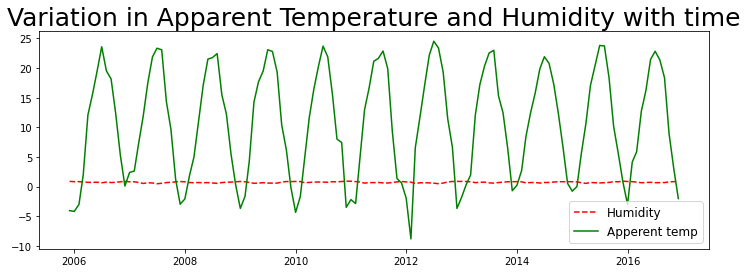

In [ ]:
plt.figure(figsize=(12,4));
plt.plot(data['Humidity'], label = 'Humidity', color = 'red',linestyle='dashed');
plt.plot(data['Apparent Temperature (C)'] , label = 'Apperent temp',color='green');
plt.title("Variation in Apparent Temperature and Humidity with time",fontsize=25);
plt.legend(loc = 0,fontsize = 12);


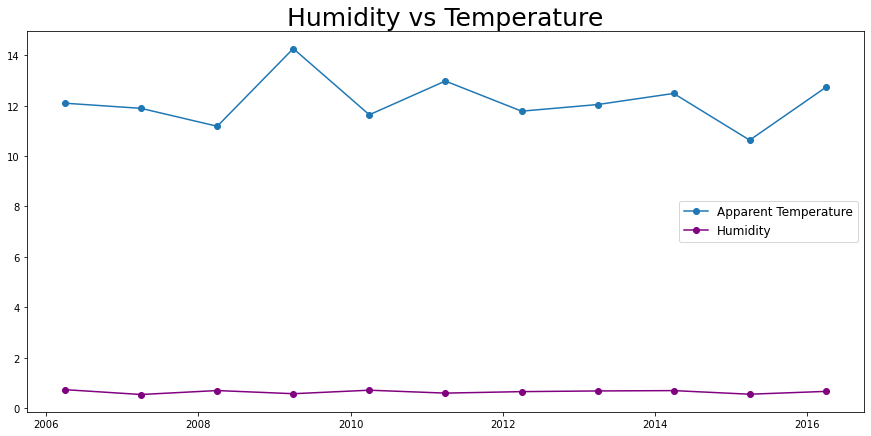

In [ ]:
april = data[data.index.month==4]
plt.figure(figsize=(15,7));
plt.plot(april.loc['2006-04-01' : '2016-04-01', 'Apparent Temperature (C)'],marker='o',linestyle='-',label = 'Apparent Temperature');
plt.plot(april.loc['2006-04-01' : '2016-04-01', 'Humidity'],marker='o',linestyle='-',label = 'Humidity',color = 'purple');
plt.title("Humidity vs Temperature",fontsize = 25)
plt.legend(loc = 'center right',fontsize = 12);




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

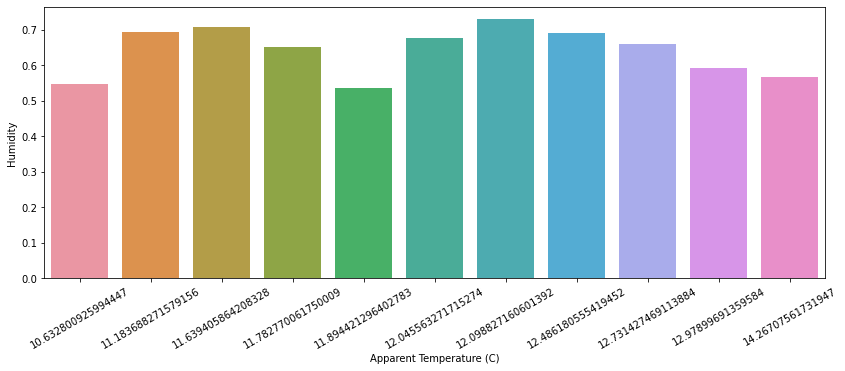

In [ ]:
plt.figure(figsize=(14,5))
sns.barplot(x='Apparent Temperature (C)',y='Humidity',data=april)
plt.xticks(rotation = 30)

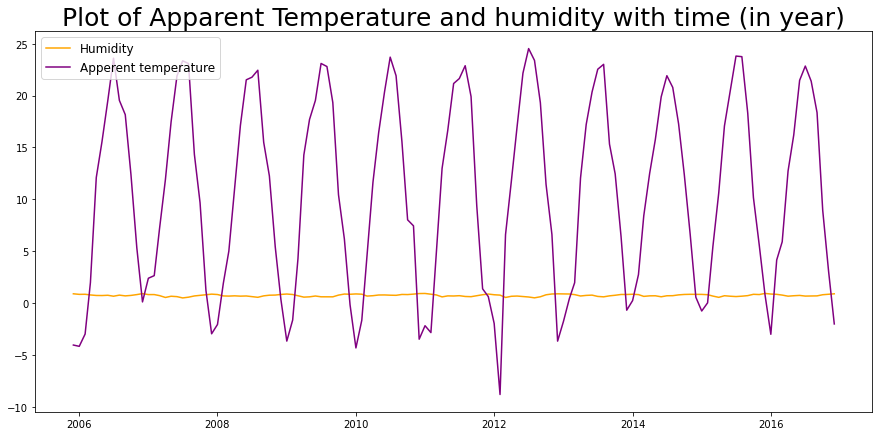

In [ ]:
plt.figure(figsize=(15,7));
plt.plot(data['Humidity'], label = 'Humidity', color = 'orange');
plt.plot(data['Apparent Temperature (C)'] , label = 'Apperent temperature',color='purple');
plt.title("Plot of Apparent Temperature and humidity with time (in year)",fontsize=25);
plt.legend(loc = 2,fontsize = 12);


In [ ]:
jan=data[data.index.month==1]
feb=data[data.index.month==2]
mar=data[data.index.month==3]
apr=data[data.index.month==4]
may=data[data.index.month==5]
jun=data[data.index.month==6]
jul=data[data.index.month==7]
aug=data[data.index.month==8]
sep=data[data.index.month==9]
octo=data[data.index.month==10]
nov=data[data.index.month==11]
dec=data[data.index.month==12]




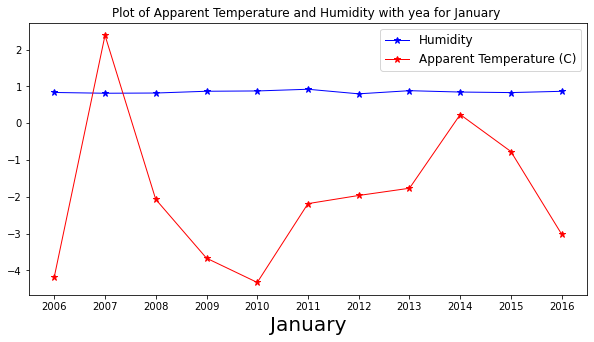

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with yea for January ')
plt.plot(jan['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(jan['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('January', fontsize=20)
plt.legend(loc=1 , fontsize=12)

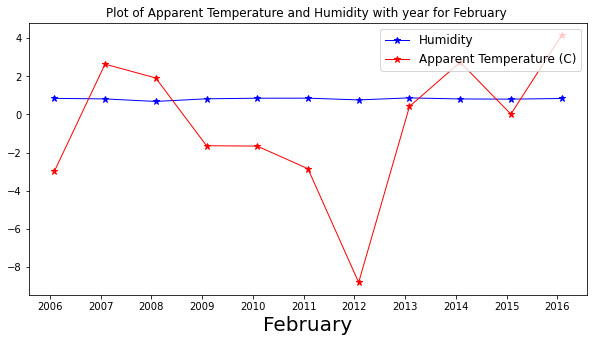

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for February ')
plt.plot(feb['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(feb['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('February', fontsize=20)
plt.legend(loc=1 , fontsize=12)

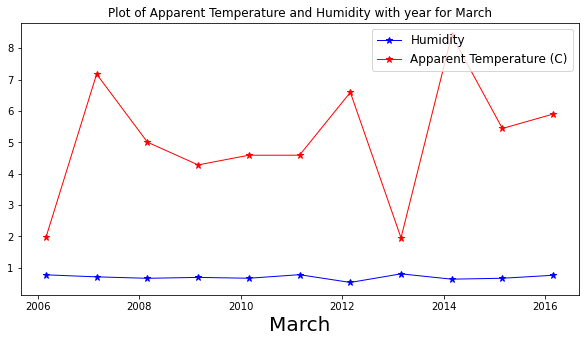

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for March')
plt.plot(mar['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(mar['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('March', fontsize=20)
plt.legend(loc=1 , fontsize=12)

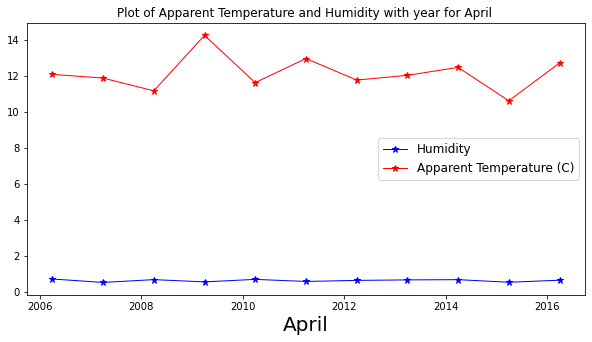

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for April ')
plt.plot(apr['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(apr['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('April', fontsize=20)
plt.legend(loc=5 , fontsize=12)

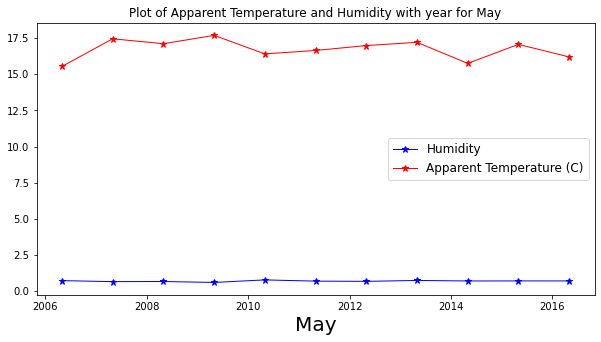

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for May')
plt.plot(may['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(may['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('May', fontsize=20)
plt.legend(loc=5 , fontsize=12)

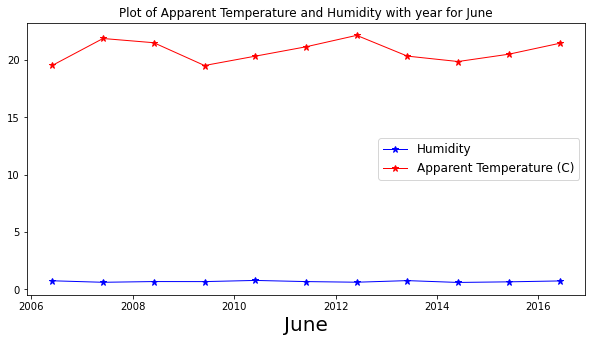

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for June')
plt.plot(jun['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(jun['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('June', fontsize=20)
plt.legend(loc=5 , fontsize=12)

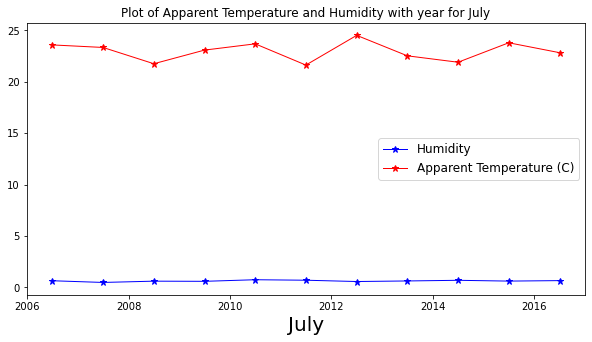

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for July')
plt.plot(jul['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(jul['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('July', fontsize=20)
plt.legend(loc=5 , fontsize=12)

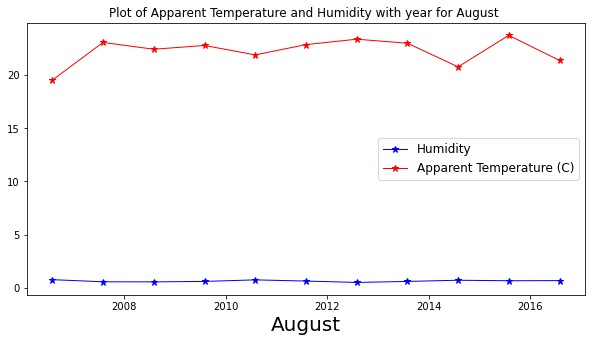

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for August ')
plt.plot(aug['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(aug['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('August', fontsize=20)
plt.legend(loc=5 , fontsize=12)

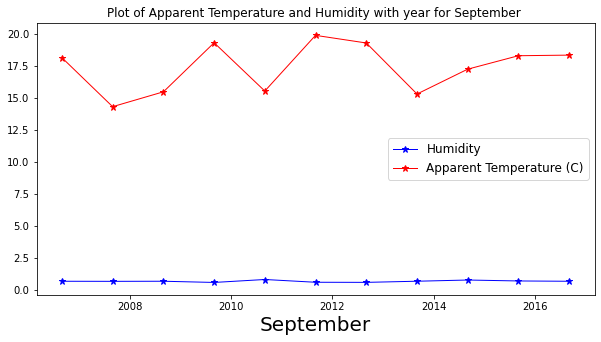

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for September ')
plt.plot(sep['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(sep['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('September', fontsize=20)
plt.legend(loc=5 , fontsize=12)

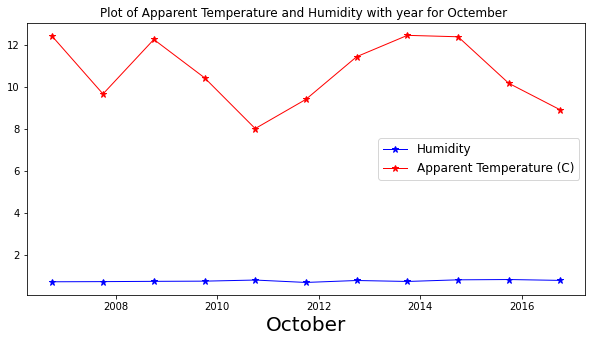

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for Octember ')
plt.plot(octo['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(octo['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('October', fontsize=20)
plt.legend(loc=5 , fontsize=12)

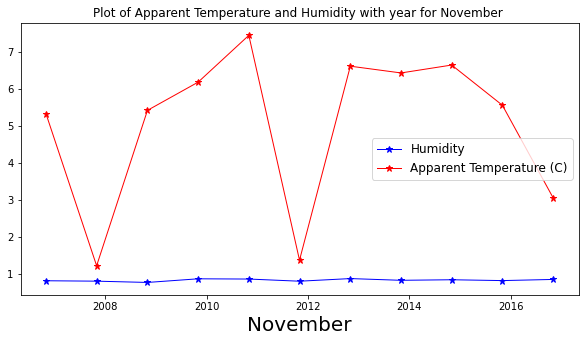

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for November ')
plt.plot(nov['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(nov['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('November', fontsize=20)
plt.legend(loc=5 , fontsize=12)

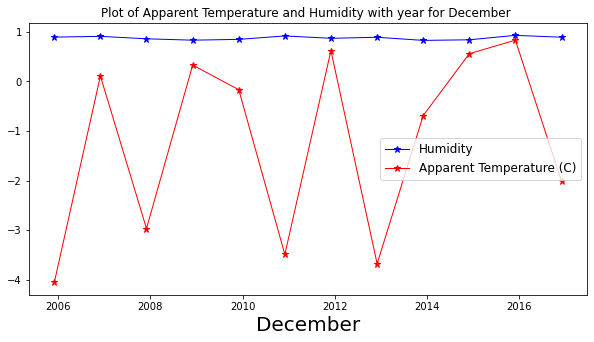

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Plot of Apparent Temperature and Humidity with year for December ')
plt.plot(dec['Humidity'],label='Humidity',color = 'blue',marker='*', linewidth=1,markersize=7)
plt.plot(dec['Apparent Temperature (C)'],label='Apparent Temperature (C)', color = 'red', marker='*',linewidth=1,markersize=7)
plt.xlabel('December', fontsize=20)
plt.legend(loc=5 , fontsize=12)

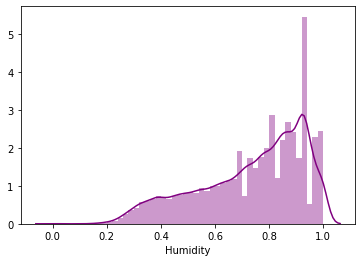

In [ ]:
sns.distplot(df.Humidity,color='purple')

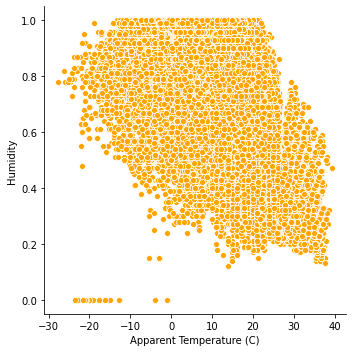

In [ ]:
sns.relplot(data=df,x='Apparent Temperature (C)', y= 'Humidity', color='orange')